In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def get_results_path(
    dataset_name: str,
    nbr_clients: int,
    nbr_rounds: int,
    personalization: bool,
    cluster_clients: bool,
    n_clusters: int,
    ala_init: bool,
    model: str = "SCINet",
    epochs: int = 200,
    patience: int = 20,
):
    sim_name = f"{dataset_name}_{nbr_clients}_{nbr_rounds}_{model}_{epochs}_{patience}_{'pers' if personalization else 'nopers'}_{'clust' if cluster_clients else 'noclust'}_{n_clusters}_{'ala' if ala_init else 'noala'}"
    simulation_results_csv_path = (
        f"../../simulations/Final_results/{sim_name}/results.csv"
    )
    return simulation_results_csv_path

In [ ]:
def get_best_test_metrics(cid: int, simulation_results_csv_path: str) -> dict:
    """
    Get the test metrics for the round with the highest validation r2 for a client.
    """
    df = pd.read_csv(simulation_results_csv_path)
    client_df = df[df["cid"] == cid]
    best_val_r2 = client_df[client_df["eval_data"] == "val"]["r2"].idxmax()
    best_val_round = client_df.loc[best_val_r2]["round"]
    best_test_metrics = client_df[
        (client_df["round"] == best_val_round) & (client_df["eval_data"] == "test")
    ]

    return {
        "round": best_test_metrics["round"].item(),
        "smape": best_test_metrics["smape"].item(),
        "mae": best_test_metrics["mae"].item(),
        "mse": best_test_metrics["mse"].item(),
        "rmse": best_test_metrics["rmse"].item(),
        "r2": best_test_metrics["r2"].item(),
    }


def get_best_test_metrics_all_clients(
    n_clients: int, simulation_results_csv_path: str, return_all: bool = False
) -> dict:
    """
    Get the test metrics for the round with the highest validation r2 for all clients. Average the metrics across clients.
    """
    best_test_metrics = {}
    for cid in range(n_clients):
        client_best_test_metrics = get_best_test_metrics(
            cid, simulation_results_csv_path
        )
        client_best_test_metrics.pop("round")
        client_best_test_metrics.pop("mae")
        client_best_test_metrics.pop("mse")
        for k, v in client_best_test_metrics.items():
            if k not in best_test_metrics:
                best_test_metrics[k] = []
            best_test_metrics[k].append(v)
    for k, v in best_test_metrics.items():
        best_test_metrics[k] = {}
        # best_test_metrics[k]["avg"] = round(sum(v) / len(v), 3)
        # best_test_metrics[k]["std"] = round(pd.Series(v).std(), 3)
        best_test_metrics[k]["q25"] = round(pd.Series(v).quantile(0.25), 3)
        best_test_metrics[k]["q50"] = round(pd.Series(v).quantile(0.5), 3)
        best_test_metrics[k]["q75"] = round(pd.Series(v).quantile(0.75), 3)
        if return_all:
            best_test_metrics[k]["all_results"] = v

    return best_test_metrics


simulation_results = get_results_path(
    dataset_name="IRISE",
    nbr_clients=23,
    nbr_rounds=40,
    personalization=True,
    cluster_clients=True,
    n_clusters=5,
    ala_init=False,
)
print(simulation_results)
get_best_test_metrics_all_clients(23, simulation_results)

../../simulations/Final_results/IRISE_23_40_SCINet_200_20_pers_clust_5_noala/results.csv


{'smape': {'q25': 41.625, 'q50': 49.793, 'q75': 58.445},
 'rmse': {'q25': 0.014, 'q50': 0.063, 'q75': 0.072},
 'r2': {'q25': 0.57, 'q50': 0.743, 'q75': 0.775}}

In [ ]:
print(
    get_best_test_metrics_all_clients(
        43, "../../simulations/Final_results/results_combined.csv"
    )
)
print(
    get_best_test_metrics_all_clients(
        43, "../../simulations/Final_results/results_combined_all.csv"
    )
)

{'smape': {'q25': 48.716, 'q50': 60.728, 'q75': 74.526}, 'rmse': {'q25': 0.044, 'q50': 0.079, 'q75': 0.093}, 'r2': {'q25': 0.211, 'q50': 0.441, 'q75': 0.628}}
{'smape': {'q25': 46.406, 'q50': 57.58, 'q75': 70.272}, 'rmse': {'q25': 0.043, 'q50': 0.074, 'q75': 0.092}, 'r2': {'q25': 0.276, 'q50': 0.496, 'q75': 0.655}}


In [5]:
def print_indiv_client_metric(simulation_results_csv_path: str, n_clients: int) -> None:
    """
    Print the best test metrics for each client.
    """
    for cid in range(n_clients):
        best_results = get_best_test_metrics(cid, simulation_results_csv_path)
        print(
            f"Client {cid}:\tsmape={best_results['smape']:0.3f}\t mae={best_results['mae']:0.3f}\t mse={best_results['mse']:0.3f}\t rmse={best_results['rmse']:0.3f}\t r2={best_results['r2']:0.3f}"
        )


print_indiv_client_metric(simulation_results, n_clients=20)

Client 0:	smape=42.079	 mae=0.045	 mse=0.005	 rmse=0.067	 r2=0.751
Client 1:	smape=58.524	 mae=0.006	 mse=0.000	 rmse=0.008	 r2=0.689
Client 2:	smape=49.115	 mae=0.023	 mse=0.001	 rmse=0.031	 r2=0.502
Client 3:	smape=58.366	 mae=0.035	 mse=0.003	 rmse=0.057	 r2=0.754
Client 4:	smape=34.668	 mae=0.009	 mse=0.000	 rmse=0.013	 r2=0.815
Client 5:	smape=74.717	 mae=0.004	 mse=0.000	 rmse=0.006	 r2=0.853
Client 6:	smape=46.578	 mae=0.050	 mse=0.006	 rmse=0.079	 r2=0.520
Client 7:	smape=86.399	 mae=0.004	 mse=0.001	 rmse=0.021	 r2=0.340
Client 8:	smape=41.073	 mae=0.042	 mse=0.005	 rmse=0.073	 r2=0.737
Client 9:	smape=39.230	 mae=0.044	 mse=0.005	 rmse=0.069	 r2=0.767
Client 10:	smape=72.096	 mae=0.054	 mse=0.008	 rmse=0.089	 r2=0.658
Client 11:	smape=63.473	 mae=0.007	 mse=0.000	 rmse=0.009	 r2=0.486
Client 12:	smape=49.829	 mae=0.003	 mse=0.000	 rmse=0.005	 r2=0.513
Client 13:	smape=42.935	 mae=0.046	 mse=0.005	 rmse=0.070	 r2=0.804
Client 14:	smape=49.793	 mae=0.048	 mse=0.005	 rmse=0.074	

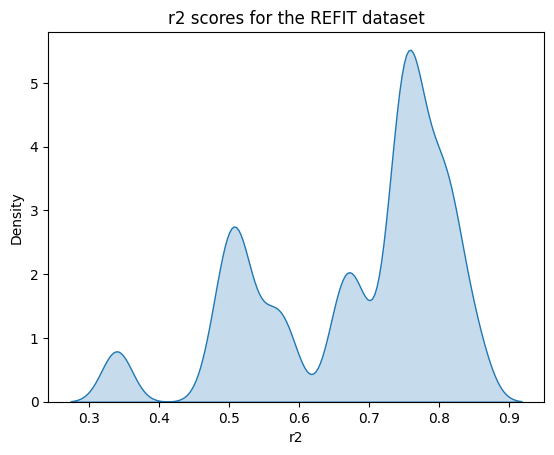

In [6]:
def plot_clients_metrics(
    simulation_results_csv_path: str,
    n_clients: int,
    metric="r2",
    dataset_name: str = "REFIT",
) -> None:
    """
    Plot the distribution of the best test metric for each client.
    """
    metrics = []
    for cid in range(n_clients):
        best_results = get_best_test_metrics(cid, simulation_results_csv_path)
        metrics.append(best_results[metric])
    sns.kdeplot(metrics, fill=True, bw_adjust=0.3)
    plt.title(f"{metric} scores for the {dataset_name} dataset")
    plt.xlabel(f"{metric}")
    plt.ylabel("Density")
    plt.show()


plot_clients_metrics(simulation_results, n_clients=23, metric="r2")

In [ ]:
local_train = [
    -0.702450216,
    -0.007840514,
    0.443405032,
    -0.087107539,
    -0.258846283,
    -0.702275038,
    -0.241406083,
    0.043216109,
    -0.206791401,
    -0.113099217,
    -0.17574501,
    -0.922001958,
    0.297037125,
    -0.818757772,
    -0.201990902,
    -0.144221842,
    0.152958155,
    -0.026656389,
    0.321834564,
    -0.128418088,
    0.027794003,
    0.144146442,
    -0.47706461,
    -0.558718681,
    0.632264435,
    -0.72065568,
    -1.732372522,
    -5.663095951,
    -0.825106382,
    0.416143656,
    -0.303224683,
    0.543272495,
    -0.124081373,
    0.535344839,
    0.658632636,
    0.68846643,
    0.377233326,
    0.747519314,
    0.477054954,
    0.23069489,
    0.523255348,
    0.569306016,
    0.495437384,
]  # copy-paste from the output of `isolated_client.py`
combined_43_30_SCINet_200_20_nopers_noclust_5_noala = get_results_path(
    dataset_name="Combined",
    nbr_clients=43,
    nbr_rounds=30,
    personalization=False,
    cluster_clients=False,
    n_clusters=5,
    ala_init=False,
)
combined_43_30_SCINet_200_20_nopers_no_clust_5_ala = get_results_path(
    dataset_name="Combined",
    nbr_clients=43,
    nbr_rounds=30,
    personalization=False,
    cluster_clients=False,
    n_clusters=5,
    ala_init=True,
)
combined_43_30_SCINet_200_20_pers_no_clust_5_noala = get_results_path(
    dataset_name="Combined",
    nbr_clients=43,
    nbr_rounds=30,
    personalization=True,
    cluster_clients=False,
    n_clusters=5,
    ala_init=False,
)
combined_43_30_SCINet_200_20_nopers_clust_5_noala = get_results_path(
    dataset_name="Combined",
    nbr_clients=43,
    nbr_rounds=40,
    personalization=False,
    cluster_clients=True,
    n_clusters=5,
    ala_init=False,
)
combined_43_30_SCINet_200_20_nopers_clust_5_ala = get_results_path(
    dataset_name="Combined",
    nbr_clients=43,
    nbr_rounds=40,
    personalization=False,
    cluster_clients=True,
    n_clusters=5,
    ala_init=True,
)
combined_43_30_SCINet_200_20_pers_clust_5_noala = get_results_path(
    dataset_name="Combined",
    nbr_clients=43,
    nbr_rounds=40,
    personalization=True,
    cluster_clients=True,
    n_clusters=5,
    ala_init=False,
)

res_fedora = get_best_test_metrics_all_clients(
    43, "../../simulations/Final_results/results_combined_all.csv", return_all=True
)
res_combined_43_30_SCINet_200_20_nopers_noclust_5_noala = (
    get_best_test_metrics_all_clients(
        43, combined_43_30_SCINet_200_20_nopers_noclust_5_noala, return_all=True
    )
)
res_combined_43_30_SCINet_200_20_nopers_no_clust_5_ala = (
    get_best_test_metrics_all_clients(
        43, combined_43_30_SCINet_200_20_nopers_no_clust_5_ala, return_all=True
    )
)
res_combined_43_30_SCINet_200_20_pers_no_clust_5_noala = (
    get_best_test_metrics_all_clients(
        43, combined_43_30_SCINet_200_20_pers_no_clust_5_noala, return_all=True
    )
)
res_combined_43_30_SCINet_200_20_nopers_clust_5_noala = (
    get_best_test_metrics_all_clients(
        43, combined_43_30_SCINet_200_20_nopers_clust_5_noala, return_all=True
    )
)
res_combined_43_30_SCINet_200_20_nopers_clust_5_ala = get_best_test_metrics_all_clients(
    43, combined_43_30_SCINet_200_20_nopers_clust_5_ala, return_all=True
)
res_combined_43_30_SCINet_200_20_pers_clust_5_noala = get_best_test_metrics_all_clients(
    43, combined_43_30_SCINet_200_20_pers_clust_5_noala, return_all=True
)

# Clip values at 0 (lower bound)
local_train_clipped = np.clip(local_train, a_min=0, a_max=None)
fedora_clipped = np.clip(res_fedora["r2"]["all_results"], a_min=0, a_max=None)
fedavg_clipped = np.clip(
    res_combined_43_30_SCINet_200_20_nopers_noclust_5_noala["r2"]["all_results"],
    a_min=0,
    a_max=None,
)
fedala_clipped = np.clip(
    res_combined_43_30_SCINet_200_20_nopers_no_clust_5_ala["r2"]["all_results"],
    a_min=0,
    a_max=None,
)
model_mix_clipped = np.clip(
    res_combined_43_30_SCINet_200_20_pers_no_clust_5_noala["r2"]["all_results"],
    a_min=0,
    a_max=None,
)

fedavg_cluster_clipped = np.clip(
    res_combined_43_30_SCINet_200_20_nopers_clust_5_noala["r2"]["all_results"],
    a_min=0,
    a_max=None,
)
fedala_cluster_clipped = np.clip(
    res_combined_43_30_SCINet_200_20_nopers_clust_5_ala["r2"]["all_results"],
    a_min=0,
    a_max=None,
)
model_mix_cluster_clipped = np.clip(
    res_combined_43_30_SCINet_200_20_pers_clust_5_noala["r2"]["all_results"],
    a_min=0,
    a_max=None,
)

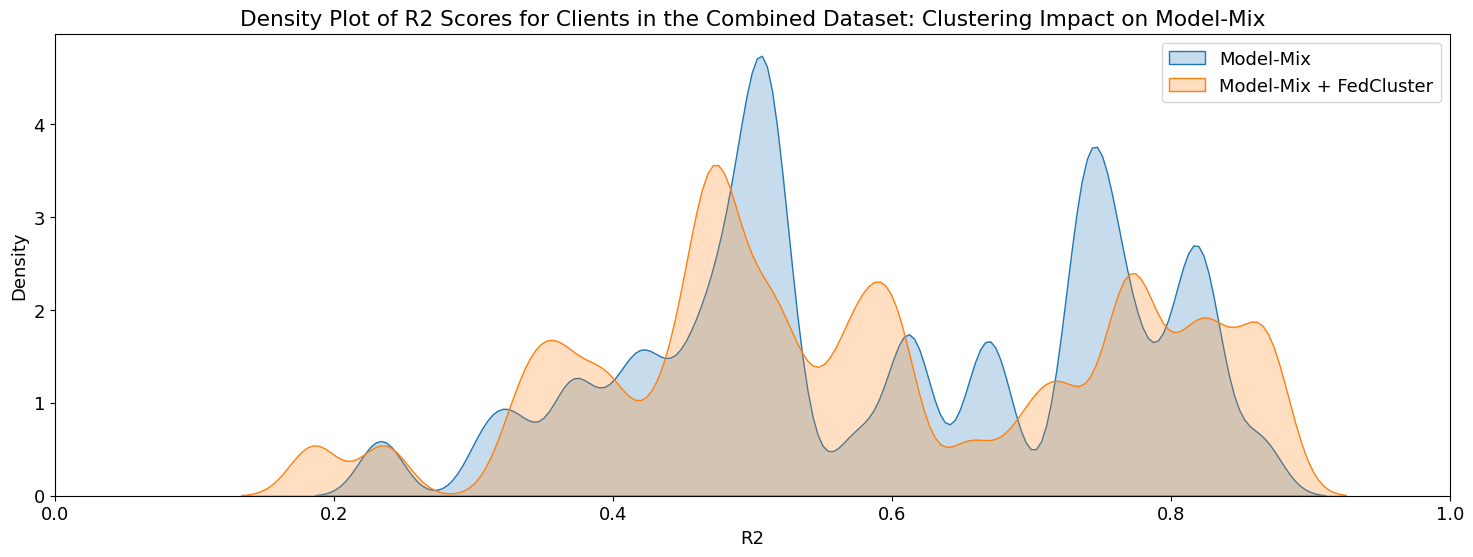

In [ ]:
plt.figure(figsize=(18, 6))
plt.rcParams.update({'font.size': 13})
fill = True
BW_ADJUST = 0.2

# sns.kdeplot(local_train_clipped, fill=True, bw_adjust=BW_ADJUST, label="Local Train")
# sns.kdeplot(fedavg_clipped, fill=fill, bw_adjust=BW_ADJUST, label="FedAvg")
# sns.kdeplot(fedala_clipped, fill=fill, bw_adjust=BW_ADJUST, label="FedALA")
sns.kdeplot(model_mix_clipped, fill=fill, bw_adjust=BW_ADJUST, label="Model-Mix")
# sns.kdeplot(fedora_clipped, fill=fill, bw_adjust=BW_ADJUST, label="Fedora")

# sns.kdeplot(fedavg_cluster_clipped, fill=fill, bw_adjust=BW_ADJUST, label="FedAvg + FedCluster")
# sns.kdeplot(fedala_cluster_clipped, fill=fill, bw_adjust=BW_ADJUST, label="FedALA + FedCluster")
sns.kdeplot(model_mix_cluster_clipped, fill=fill, bw_adjust=BW_ADJUST, label="Model-Mix + FedCluster")

plt.title("Density Plot of R2 Scores for Clients in the Combined Dataset: Clustering Impact on Model-Mix")
plt.xlim(0.0, 1.0)
plt.xlabel("R2")
plt.ylabel("Density")
plt.legend()


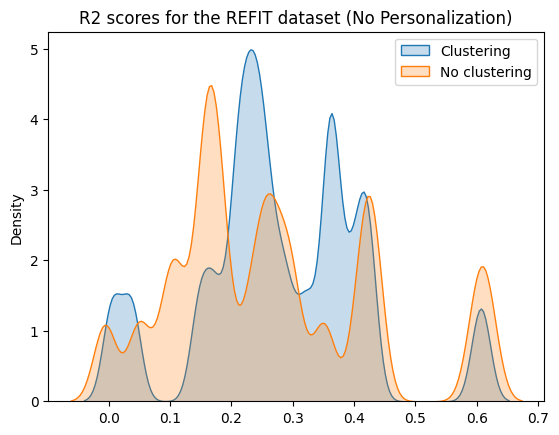

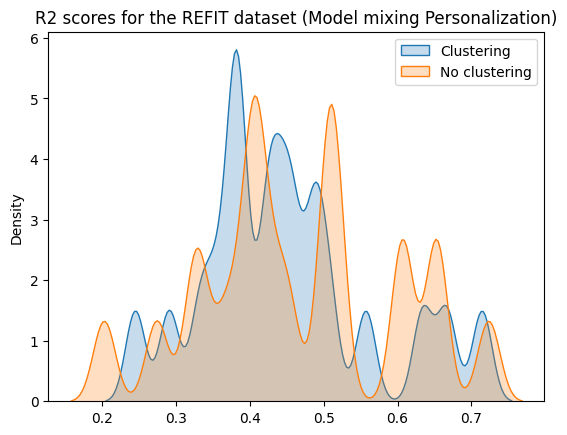

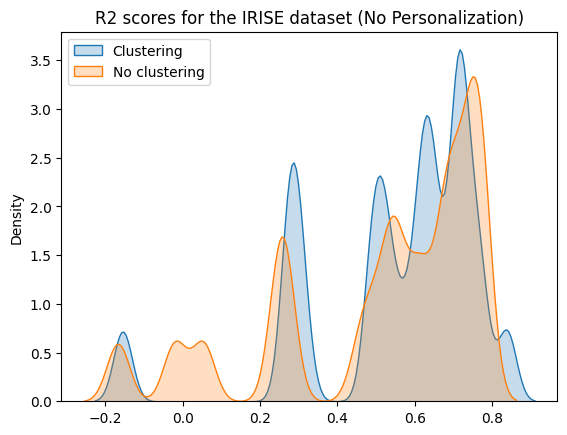

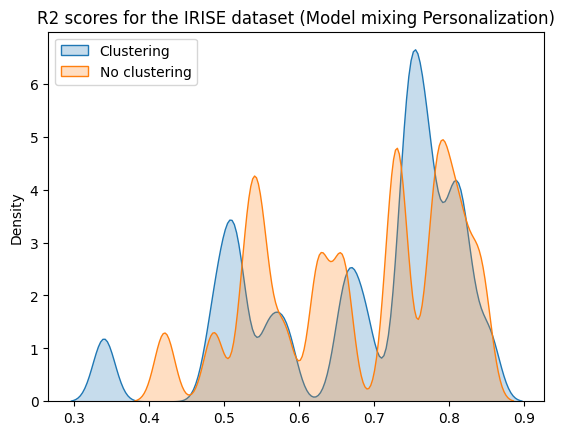

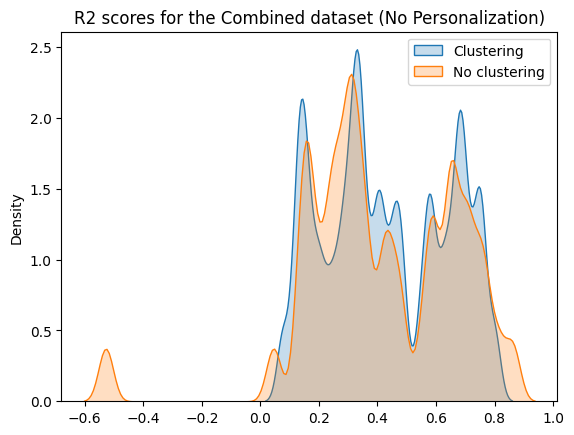

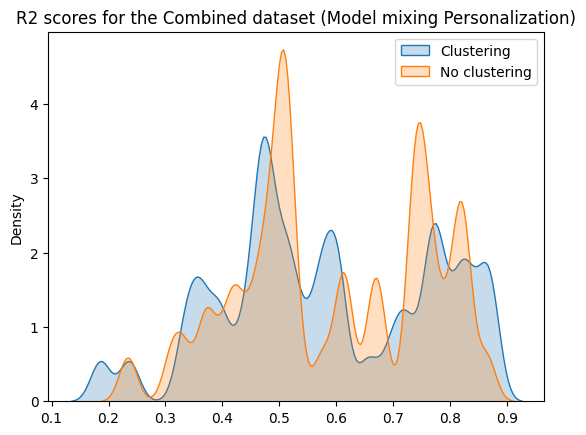

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

def compare_clustering(
    dataset_name: str,
    nbr_clients: int,
    personalization: bool,
    n_clusters: int,
    ala_init: bool,
) -> None:
    
    results_with_cluster_path = get_results_path(
        dataset_name, nbr_clients, 40, personalization, True, n_clusters, ala_init
    )
    results_no_cluster_path = get_results_path(
        dataset_name, nbr_clients, 30, personalization, False, n_clusters, ala_init
    )

    r2_list_with_clust = []
    r2_list_no_clust = []
    for cid in range(nbr_clients):
        best_results_with_clust = get_best_test_metrics(cid, results_with_cluster_path)
        best_results_no_clust = get_best_test_metrics(cid, results_no_cluster_path)
        r2_list_with_clust.append(best_results_with_clust["r2"])
        r2_list_no_clust.append(best_results_no_clust["r2"])

    sns.kdeplot(
        r2_list_with_clust,
        fill=True,
        bw_adjust=BW_ADJUST,
        label="Clustering",
    )
    sns.kdeplot(
        r2_list_no_clust, 
        fill=True, 
        bw_adjust=BW_ADJUST, 
        label="No clustering")
    plt.legend()
    pers = (
        "Model mixing Personalization"
        if personalization
        else "ALA Personalization" if ala_init else "No Personalization"
    )
    plt.title(f"R2 scores for the {dataset_name} dataset ({pers})")
    plt.show()


compare_clustering(
    "REFIT", nbr_clients=20, personalization=False, n_clusters=3, ala_init=False
)
compare_clustering(
    "REFIT", nbr_clients=20, personalization=True, n_clusters=3, ala_init=False
)
compare_clustering(
    "IRISE", nbr_clients=23, personalization=False, n_clusters=5, ala_init=False
)
compare_clustering(
    "IRISE", nbr_clients=23, personalization=True, n_clusters=5, ala_init=False
)
compare_clustering(
    "Combined", nbr_clients=43, personalization=False, n_clusters=5, ala_init=False
)
compare_clustering(
    "Combined", nbr_clients=43, personalization=True, n_clusters=5, ala_init=False
)

In [10]:
import scipy.stats as stats


def compare_r2_scores(r2_list_model1, r2_list_model2):
    """
    Compare R2 scores for two models and check if the difference is statistically significant.
    """
    t_stat, p_value = stats.ttest_rel(r2_list_model1, r2_list_model2)

    print(f"T-statistic: {t_stat:0.3f}")
    print(f"P-value: {p_value:0.3f}")

    # Interpretation
    if p_value < 0.05:
        print("The improvement in R2 score IS statistically significant.")
    else:
        print("The improvement in R2 score IS NOT statistically significant.")

    mean_diff = sum(r2_list_model1) / len(r2_list_model1) - sum(r2_list_model2) / len(
        r2_list_model2
    )
    if mean_diff > 0:
        print(
            f"-> Second simulation had better R2 score by {mean_diff:0.4f} on average."
        )
    else:
        print(
            f"-> First simulation had better R2 score by {abs(mean_diff):0.4f} on average."
        )


def compare_simulations(
    sim1_csv_path: str,
    sim2_csv_path: str,
    n_clients: int = 23,
) -> None:
    r2_list_model1 = []
    r2_list_model2 = []
    for cid in range(n_clients):
        best_results_model1 = get_best_test_metrics(cid, sim1_csv_path)
        best_results_model2 = get_best_test_metrics(cid, sim2_csv_path)
        r2_list_model1.append(best_results_model1["r2"])
        r2_list_model2.append(best_results_model2["r2"])

    compare_r2_scores(r2_list_model1, r2_list_model2)


sim1_csv_path = get_results_path(
    "Combined",
    nbr_clients=43,
    nbr_rounds=30,
    personalization=True,
    cluster_clients=False,
    n_clusters=5,
    ala_init=False,
)
sim2_csv_path = get_results_path(
    "Combined",
    nbr_clients=43,
    nbr_rounds=40,
    personalization=True,
    cluster_clients=True,
    n_clusters=5,
    ala_init=False,
)

compare_simulations(sim1_csv_path, sim2_csv_path, n_clients=43)

T-statistic: 0.811
P-value: 0.422
The improvement in R2 score IS NOT statistically significant.
-> Second simulation had better R2 score by 0.0103 on average.
